# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [4]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [5e4, 5e5, 5e6]

results = {}
best_val = -1
best_svm = None

import itertools as it

learning_rates = np.logspace(-9, -5, num=9)
regularization_strengths = np.logspace(2, 6, num=13)
combs = it.product(learning_rates, regularization_strengths)
# results is dictionary mapping tuples of the form
# (learning_rate, regularization_strength) to tuples of the form
# (training_accuracy, validation_accuracy). The accuracy is simply the fraction
# of data points that are correctly classified.
results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.
best_svm = None # The LinearSVM object that achieved the highest validation rate.

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
for lr, reg in combs:
    print(lr, reg)
    svm = LinearSVM()
    loss_hist = svm.train(X_train_feats, y_train, learning_rate=lr, reg=reg,
                          num_iters=1500, verbose=True)
    y_train_pred = svm.predict(X_train_feats)
    y_val_pred = svm.predict(X_val_feats)
    
    train_acc = np.mean(y_train == y_train_pred)
    val_acc = (np.mean(y_val == y_val_pred))

    results[(lr, reg)] = (train_acc, val_acc)
    if best_val < val_acc:
        best_val = val_acc
        best_svm = svm
        best_lr = lr
        best_reg = reg

################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

1e-09 100.0
iteration 0 / 1500: loss 9.178150
iteration 100 / 1500: loss 9.166668
iteration 200 / 1500: loss 9.154956
iteration 300 / 1500: loss 9.166822
iteration 400 / 1500: loss 9.156840
iteration 500 / 1500: loss 9.176035
iteration 600 / 1500: loss 9.156549
iteration 700 / 1500: loss 9.182664
iteration 800 / 1500: loss 9.170371
iteration 900 / 1500: loss 9.150567
iteration 1000 / 1500: loss 9.168714
iteration 1100 / 1500: loss 9.173440
iteration 1200 / 1500: loss 9.164940
iteration 1300 / 1500: loss 9.169974
iteration 1400 / 1500: loss 9.166894
1e-09 215.443469003
iteration 0 / 1500: loss 9.304542
iteration 100 / 1500: loss 9.288646
iteration 200 / 1500: loss 9.287847
iteration 300 / 1500: loss 9.288219
iteration 400 / 1500: loss 9.294243
iteration 500 / 1500: loss 9.307444
iteration 600 / 1500: loss 9.300411
iteration 700 / 1500: loss 9.304913
iteration 800 / 1500: loss 9.312226
iteration 900 / 1500: loss 9.286858
iteration 1000 / 1500: loss 9.315215
iteration 1100 / 1500: loss 9.

iteration 300 / 1500: loss 9.302568
iteration 400 / 1500: loss 9.313826
iteration 500 / 1500: loss 9.312175
iteration 600 / 1500: loss 9.298738
iteration 700 / 1500: loss 9.307638
iteration 800 / 1500: loss 9.315470
iteration 900 / 1500: loss 9.311889
iteration 1000 / 1500: loss 9.301213
iteration 1100 / 1500: loss 9.320376
iteration 1200 / 1500: loss 9.300933
iteration 1300 / 1500: loss 9.303425
iteration 1400 / 1500: loss 9.290060
3.16227766017e-09 464.158883361
iteration 0 / 1500: loss 9.723643
iteration 100 / 1500: loss 9.717034
iteration 200 / 1500: loss 9.723859
iteration 300 / 1500: loss 9.714351
iteration 400 / 1500: loss 9.702819
iteration 500 / 1500: loss 9.725898
iteration 600 / 1500: loss 9.733663
iteration 700 / 1500: loss 9.717274
iteration 800 / 1500: loss 9.720663
iteration 900 / 1500: loss 9.712670
iteration 1000 / 1500: loss 9.713297
iteration 1100 / 1500: loss 9.722731
iteration 1200 / 1500: loss 9.708420
iteration 1300 / 1500: loss 9.705319
iteration 1400 / 1500: lo

iteration 400 / 1500: loss 9.690345
iteration 500 / 1500: loss 9.670034
iteration 600 / 1500: loss 9.682262
iteration 700 / 1500: loss 9.690407
iteration 800 / 1500: loss 9.681805
iteration 900 / 1500: loss 9.679547
iteration 1000 / 1500: loss 9.681091
iteration 1100 / 1500: loss 9.691260
iteration 1200 / 1500: loss 9.688128
iteration 1300 / 1500: loss 9.686078
iteration 1400 / 1500: loss 9.670985
1e-08 1000.0
iteration 0 / 1500: loss 10.628693
iteration 100 / 1500: loss 10.582723
iteration 200 / 1500: loss 10.602290
iteration 300 / 1500: loss 10.604153
iteration 400 / 1500: loss 10.592250
iteration 500 / 1500: loss 10.586986
iteration 600 / 1500: loss 10.600722
iteration 700 / 1500: loss 10.590738
iteration 800 / 1500: loss 10.571779
iteration 900 / 1500: loss 10.582700
iteration 1000 / 1500: loss 10.565521
iteration 1100 / 1500: loss 10.577905
iteration 1200 / 1500: loss 10.561478
iteration 1300 / 1500: loss 10.561919
iteration 1400 / 1500: loss 10.564619
1e-08 2154.43469003
iteratio

iteration 900 / 1500: loss 10.489328
iteration 1000 / 1500: loss 10.475864
iteration 1100 / 1500: loss 10.461151
iteration 1200 / 1500: loss 10.465007
iteration 1300 / 1500: loss 10.452164
iteration 1400 / 1500: loss 10.440382
3.16227766017e-08 2154.43469003
iteration 0 / 1500: loss 12.454992
iteration 100 / 1500: loss 12.390271
iteration 200 / 1500: loss 12.365534
iteration 300 / 1500: loss 12.309167
iteration 400 / 1500: loss 12.266244
iteration 500 / 1500: loss 12.219049
iteration 600 / 1500: loss 12.178015
iteration 700 / 1500: loss 12.129992
iteration 800 / 1500: loss 12.075902
iteration 900 / 1500: loss 12.054112
iteration 1000 / 1500: loss 12.010981
iteration 1100 / 1500: loss 11.975313
iteration 1200 / 1500: loss 11.937459
iteration 1300 / 1500: loss 11.894974
iteration 1400 / 1500: loss 11.850786
3.16227766017e-08 4641.58883361
iteration 0 / 1500: loss 16.006519
iteration 100 / 1500: loss 15.802199
iteration 200 / 1500: loss 15.613340
iteration 300 / 1500: loss 15.429021
itera

iteration 1200 / 1500: loss 10.983389
iteration 1300 / 1500: loss 10.894578
iteration 1400 / 1500: loss 10.817081
1e-07 4641.58883361
iteration 0 / 1500: loss 16.263957
iteration 100 / 1500: loss 15.620172
iteration 200 / 1500: loss 15.038489
iteration 300 / 1500: loss 14.489552
iteration 400 / 1500: loss 14.014125
iteration 500 / 1500: loss 13.554259
iteration 600 / 1500: loss 13.148421
iteration 700 / 1500: loss 12.792553
iteration 800 / 1500: loss 12.456845
iteration 900 / 1500: loss 12.148572
iteration 1000 / 1500: loss 11.867206
iteration 1100 / 1500: loss 11.609674
iteration 1200 / 1500: loss 11.379748
iteration 1300 / 1500: loss 11.166785
iteration 1400 / 1500: loss 10.974676
1e-07 10000.0
iteration 0 / 1500: loss 25.284125
iteration 100 / 1500: loss 22.330603
iteration 200 / 1500: loss 19.925915
iteration 300 / 1500: loss 17.925499
iteration 400 / 1500: loss 16.315324
iteration 500 / 1500: loss 14.989481
iteration 600 / 1500: loss 13.904309
iteration 700 / 1500: loss 13.015762


iteration 200 / 1500: loss 13.406719
iteration 300 / 1500: loss 11.345860
iteration 400 / 1500: loss 10.239076
iteration 500 / 1500: loss 9.659977
iteration 600 / 1500: loss 9.349293
iteration 700 / 1500: loss 9.186356
iteration 800 / 1500: loss 9.097595
iteration 900 / 1500: loss 9.052080
iteration 1000 / 1500: loss 9.027715
iteration 1100 / 1500: loss 9.013923
iteration 1200 / 1500: loss 9.007227
iteration 1300 / 1500: loss 9.003556
iteration 1400 / 1500: loss 9.002151
3.16227766017e-07 21544.3469003
iteration 0 / 1500: loss 41.877384
iteration 100 / 1500: loss 17.371699
iteration 200 / 1500: loss 11.126809
iteration 300 / 1500: loss 9.542584
iteration 400 / 1500: loss 9.138401
iteration 500 / 1500: loss 9.034876
iteration 600 / 1500: loss 9.008900
iteration 700 / 1500: loss 9.001917
iteration 800 / 1500: loss 9.000406
iteration 900 / 1500: loss 9.000228
iteration 1000 / 1500: loss 8.999757
iteration 1100 / 1500: loss 9.000321
iteration 1200 / 1500: loss 8.999903
iteration 1300 / 150

iteration 900 / 1500: loss 9.000183
iteration 1000 / 1500: loss 9.000030
iteration 1100 / 1500: loss 8.999869
iteration 1200 / 1500: loss 9.000201
iteration 1300 / 1500: loss 9.000337
iteration 1400 / 1500: loss 9.000034
1e-06 46415.8883361
iteration 0 / 1500: loss 78.723346
iteration 100 / 1500: loss 9.005113
iteration 200 / 1500: loss 8.999896
iteration 300 / 1500: loss 9.000051
iteration 400 / 1500: loss 8.999955
iteration 500 / 1500: loss 8.999974
iteration 600 / 1500: loss 9.000142
iteration 700 / 1500: loss 9.000144
iteration 800 / 1500: loss 8.999995
iteration 900 / 1500: loss 9.000011
iteration 1000 / 1500: loss 9.000259
iteration 1100 / 1500: loss 8.999845
iteration 1200 / 1500: loss 9.000182
iteration 1300 / 1500: loss 9.000241
iteration 1400 / 1500: loss 9.000049
1e-06 100000.0
iteration 0 / 1500: loss 158.591185
iteration 100 / 1500: loss 9.000090
iteration 200 / 1500: loss 9.000053
iteration 300 / 1500: loss 9.000017
iteration 400 / 1500: loss 9.000031
iteration 500 / 1500

3.16227766017e-06 100000.0
iteration 0 / 1500: loss 166.649182
iteration 100 / 1500: loss 9.000085
iteration 200 / 1500: loss 9.000104
iteration 300 / 1500: loss 9.000107
iteration 400 / 1500: loss 9.000179
iteration 500 / 1500: loss 9.000175
iteration 600 / 1500: loss 9.000204
iteration 700 / 1500: loss 9.000132
iteration 800 / 1500: loss 9.000153
iteration 900 / 1500: loss 9.000143
iteration 1000 / 1500: loss 9.000128
iteration 1100 / 1500: loss 9.000075
iteration 1200 / 1500: loss 9.000116
iteration 1300 / 1500: loss 9.000106
iteration 1400 / 1500: loss 9.000052
3.16227766017e-06 215443.469003
iteration 0 / 1500: loss 345.907701
iteration 100 / 1500: loss 9.000137
iteration 200 / 1500: loss 9.000105
iteration 300 / 1500: loss 9.000158
iteration 400 / 1500: loss 9.000206
iteration 500 / 1500: loss 9.000136
iteration 600 / 1500: loss 9.000152
iteration 700 / 1500: loss 9.000128
iteration 800 / 1500: loss 9.000123
iteration 900 / 1500: loss 9.000177
iteration 1000 / 1500: loss 9.000144

cs231n/classifiers/linear_svm.py:111: RuntimeWarning: overflow encountered in double_scalars
  loss += reg * np.sum(W * W)
cs231n/classifiers/linear_svm.py:111: RuntimeWarning: overflow encountered in multiply
  loss += reg * np.sum(W * W)


iteration 500 / 1500: loss inf
iteration 600 / 1500: loss inf
iteration 700 / 1500: loss inf
iteration 800 / 1500: loss inf
iteration 900 / 1500: loss inf


cs231n/classifiers/linear_svm.py:112: RuntimeWarning: overflow encountered in multiply
  dW += reg * W
cs231n/classifiers/linear_svm.py:84: RuntimeWarning: invalid value encountered in subtract
  margins = np.maximum(0, scores - correct_class_score[:, None] + 1)
cs231n/classifiers/linear_svm.py:98: RuntimeWarning: invalid value encountered in greater
  mask = np.where(margins > 0, True, False)
cs231n/classifiers/linear_classifier.py:70: RuntimeWarning: invalid value encountered in subtract
  self.W -= learning_rate * grad


iteration 1000 / 1500: loss nan
iteration 1100 / 1500: loss nan
iteration 1200 / 1500: loss nan
iteration 1300 / 1500: loss nan
iteration 1400 / 1500: loss nan
1e-05 100.0
iteration 0 / 1500: loss 9.183472
iteration 100 / 1500: loss 9.079996
iteration 200 / 1500: loss 9.002665
iteration 300 / 1500: loss 8.956553
iteration 400 / 1500: loss 8.935143
iteration 500 / 1500: loss 8.900308
iteration 600 / 1500: loss 8.868780
iteration 700 / 1500: loss 8.828831
iteration 800 / 1500: loss 8.890149
iteration 900 / 1500: loss 8.843626
iteration 1000 / 1500: loss 8.868973
iteration 1100 / 1500: loss 8.887578
iteration 1200 / 1500: loss 8.816753
iteration 1300 / 1500: loss 8.852919
iteration 1400 / 1500: loss 8.912537
1e-05 215.443469003
iteration 0 / 1500: loss 9.338964
iteration 100 / 1500: loss 9.167808
iteration 200 / 1500: loss 9.061083
iteration 300 / 1500: loss 9.000614
iteration 400 / 1500: loss 8.964031
iteration 500 / 1500: loss 8.967189
iteration 600 / 1500: loss 8.950164
iteration 700 /

iteration 500 / 1500: loss inf
iteration 600 / 1500: loss nan
iteration 700 / 1500: loss nan
iteration 800 / 1500: loss nan
iteration 900 / 1500: loss nan
iteration 1000 / 1500: loss nan
iteration 1100 / 1500: loss nan
iteration 1200 / 1500: loss nan
iteration 1300 / 1500: loss nan
iteration 1400 / 1500: loss nan
1e-05 1000000.0
iteration 0 / 1500: loss 1574.804678
iteration 100 / 1500: loss 110468787119710630678708414469845271934756687154688326473376990677531563256872203557323322019837220544319886600643089114328552528003198745381889646381285084218650214047645556456145370295989960704.000000
iteration 200 / 1500: loss inf
iteration 300 / 1500: loss inf
iteration 400 / 1500: loss nan
iteration 500 / 1500: loss nan
iteration 600 / 1500: loss nan
iteration 700 / 1500: loss nan
iteration 800 / 1500: loss nan
iteration 900 / 1500: loss nan
iteration 1000 / 1500: loss nan
iteration 1100 / 1500: loss nan
iteration 1200 / 1500: loss nan
iteration 1300 / 1500: loss nan
iteration 1400 / 1500: los

In [5]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.423


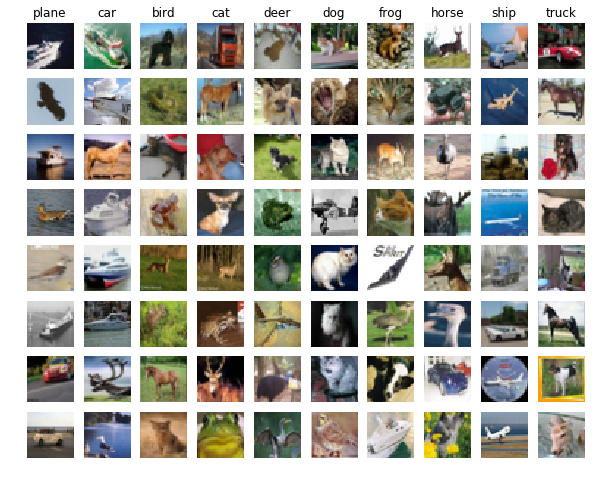

In [6]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [7]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
# Train the network
stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
            num_iters=300000, batch_size=96,
            learning_rate=5e-2, learning_rate_decay=0.95,
            reg=0.005, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val_feats) == y_val).mean()
print('Validation accuracy: ', val_acc)

best_net = net

################################################################################
#                              END OF YOUR CODE                                #
################################################################################

iteration 0 / 300000: loss 2.302587
iteration 100 / 300000: loss 2.300624
iteration 200 / 300000: loss 2.301169
iteration 300 / 300000: loss 2.289619
iteration 400 / 300000: loss 2.156339
iteration 500 / 300000: loss 1.949245
iteration 600 / 300000: loss 1.848642
iteration 700 / 300000: loss 1.722030
iteration 800 / 300000: loss 1.630581
iteration 900 / 300000: loss 1.541887
iteration 1000 / 300000: loss 1.389756
iteration 1100 / 300000: loss 1.294364
iteration 1200 / 300000: loss 1.394396
iteration 1300 / 300000: loss 1.377040
iteration 1400 / 300000: loss 1.459425
iteration 1500 / 300000: loss 1.639436
iteration 1600 / 300000: loss 1.617754
iteration 1700 / 300000: loss 1.481472
iteration 1800 / 300000: loss 1.508437
iteration 1900 / 300000: loss 1.369077
iteration 2000 / 300000: loss 1.254455
iteration 2100 / 300000: loss 1.500820
iteration 2200 / 300000: loss 1.398958
iteration 2300 / 300000: loss 1.276307
iteration 2400 / 300000: loss 1.542714
iteration 2500 / 300000: loss 1.56888

iteration 20900 / 300000: loss 1.288766
iteration 21000 / 300000: loss 1.278827
iteration 21100 / 300000: loss 1.256844
iteration 21200 / 300000: loss 1.265703
iteration 21300 / 300000: loss 1.254325
iteration 21400 / 300000: loss 1.263687
iteration 21500 / 300000: loss 1.393448
iteration 21600 / 300000: loss 1.209360
iteration 21700 / 300000: loss 1.348764
iteration 21800 / 300000: loss 1.380413
iteration 21900 / 300000: loss 1.178398
iteration 22000 / 300000: loss 1.237517
iteration 22100 / 300000: loss 1.111416
iteration 22200 / 300000: loss 1.187700
iteration 22300 / 300000: loss 1.096050
iteration 22400 / 300000: loss 1.383926
iteration 22500 / 300000: loss 1.221395
iteration 22600 / 300000: loss 1.173463
iteration 22700 / 300000: loss 1.239371
iteration 22800 / 300000: loss 1.286926
iteration 22900 / 300000: loss 1.315459
iteration 23000 / 300000: loss 1.297277
iteration 23100 / 300000: loss 1.250645
iteration 23200 / 300000: loss 1.214450
iteration 23300 / 300000: loss 1.317778


iteration 41500 / 300000: loss 1.295615
iteration 41600 / 300000: loss 1.324157
iteration 41700 / 300000: loss 1.334350
iteration 41800 / 300000: loss 1.185675
iteration 41900 / 300000: loss 1.207954
iteration 42000 / 300000: loss 1.289798
iteration 42100 / 300000: loss 1.332614
iteration 42200 / 300000: loss 1.373721
iteration 42300 / 300000: loss 1.193589
iteration 42400 / 300000: loss 1.250256
iteration 42500 / 300000: loss 1.210580
iteration 42600 / 300000: loss 1.292401
iteration 42700 / 300000: loss 1.175924
iteration 42800 / 300000: loss 1.251408
iteration 42900 / 300000: loss 1.224981
iteration 43000 / 300000: loss 1.244698
iteration 43100 / 300000: loss 1.388834
iteration 43200 / 300000: loss 1.207084
iteration 43300 / 300000: loss 1.157185
iteration 43400 / 300000: loss 1.166318
iteration 43500 / 300000: loss 1.246718
iteration 43600 / 300000: loss 1.259961
iteration 43700 / 300000: loss 1.287283
iteration 43800 / 300000: loss 1.291677
iteration 43900 / 300000: loss 1.098024


iteration 62100 / 300000: loss 1.369165
iteration 62200 / 300000: loss 1.248894
iteration 62300 / 300000: loss 1.094214
iteration 62400 / 300000: loss 1.176853
iteration 62500 / 300000: loss 1.252982
iteration 62600 / 300000: loss 1.198502
iteration 62700 / 300000: loss 1.253726
iteration 62800 / 300000: loss 1.332624
iteration 62900 / 300000: loss 1.277091
iteration 63000 / 300000: loss 1.127441
iteration 63100 / 300000: loss 1.266068
iteration 63200 / 300000: loss 1.145056
iteration 63300 / 300000: loss 1.299534
iteration 63400 / 300000: loss 1.145951
iteration 63500 / 300000: loss 1.351109
iteration 63600 / 300000: loss 1.347472
iteration 63700 / 300000: loss 1.259317
iteration 63800 / 300000: loss 1.073974
iteration 63900 / 300000: loss 1.306772
iteration 64000 / 300000: loss 1.243301
iteration 64100 / 300000: loss 1.316876
iteration 64200 / 300000: loss 1.072085
iteration 64300 / 300000: loss 1.386668
iteration 64400 / 300000: loss 1.150817
iteration 64500 / 300000: loss 1.308231


iteration 82700 / 300000: loss 1.143291
iteration 82800 / 300000: loss 1.246855
iteration 82900 / 300000: loss 1.277473
iteration 83000 / 300000: loss 1.281194
iteration 83100 / 300000: loss 1.169097
iteration 83200 / 300000: loss 1.308294
iteration 83300 / 300000: loss 1.196056
iteration 83400 / 300000: loss 1.380668
iteration 83500 / 300000: loss 1.482735
iteration 83600 / 300000: loss 1.243656
iteration 83700 / 300000: loss 1.136673
iteration 83800 / 300000: loss 1.206578
iteration 83900 / 300000: loss 1.290163
iteration 84000 / 300000: loss 1.288030
iteration 84100 / 300000: loss 1.143111
iteration 84200 / 300000: loss 1.158506
iteration 84300 / 300000: loss 1.282684
iteration 84400 / 300000: loss 1.133115
iteration 84500 / 300000: loss 1.202038
iteration 84600 / 300000: loss 1.105168
iteration 84700 / 300000: loss 1.218940
iteration 84800 / 300000: loss 1.337302
iteration 84900 / 300000: loss 1.263460
iteration 85000 / 300000: loss 1.268523
iteration 85100 / 300000: loss 1.206903


iteration 103300 / 300000: loss 1.290100
iteration 103400 / 300000: loss 1.143822
iteration 103500 / 300000: loss 1.243067
iteration 103600 / 300000: loss 1.217557
iteration 103700 / 300000: loss 1.254174
iteration 103800 / 300000: loss 1.365465
iteration 103900 / 300000: loss 1.178930
iteration 104000 / 300000: loss 1.160851
iteration 104100 / 300000: loss 1.335006
iteration 104200 / 300000: loss 1.128242
iteration 104300 / 300000: loss 1.296706
iteration 104400 / 300000: loss 1.060764
iteration 104500 / 300000: loss 1.181303
iteration 104600 / 300000: loss 1.307527
iteration 104700 / 300000: loss 1.099021
iteration 104800 / 300000: loss 1.129744
iteration 104900 / 300000: loss 1.059399
iteration 105000 / 300000: loss 1.185644
iteration 105100 / 300000: loss 1.315686
iteration 105200 / 300000: loss 1.104247
iteration 105300 / 300000: loss 1.070379
iteration 105400 / 300000: loss 1.242136
iteration 105500 / 300000: loss 1.264188
iteration 105600 / 300000: loss 1.244181
iteration 105700

iteration 123300 / 300000: loss 1.113375
iteration 123400 / 300000: loss 1.503654
iteration 123500 / 300000: loss 1.339608
iteration 123600 / 300000: loss 1.302309
iteration 123700 / 300000: loss 1.242482
iteration 123800 / 300000: loss 1.275007
iteration 123900 / 300000: loss 1.299266
iteration 124000 / 300000: loss 1.242719
iteration 124100 / 300000: loss 1.273470
iteration 124200 / 300000: loss 1.250332
iteration 124300 / 300000: loss 1.276405
iteration 124400 / 300000: loss 1.246579
iteration 124500 / 300000: loss 1.428267
iteration 124600 / 300000: loss 1.220436
iteration 124700 / 300000: loss 1.198981
iteration 124800 / 300000: loss 1.060936
iteration 124900 / 300000: loss 1.259468
iteration 125000 / 300000: loss 1.330421
iteration 125100 / 300000: loss 1.243000
iteration 125200 / 300000: loss 1.360851
iteration 125300 / 300000: loss 1.248379
iteration 125400 / 300000: loss 1.372753
iteration 125500 / 300000: loss 1.291966
iteration 125600 / 300000: loss 1.316617
iteration 125700

iteration 143300 / 300000: loss 1.345253
iteration 143400 / 300000: loss 1.329217
iteration 143500 / 300000: loss 1.335779
iteration 143600 / 300000: loss 1.175645
iteration 143700 / 300000: loss 1.284583
iteration 143800 / 300000: loss 1.454927
iteration 143900 / 300000: loss 1.283099
iteration 144000 / 300000: loss 1.128955
iteration 144100 / 300000: loss 1.186558
iteration 144200 / 300000: loss 1.191811
iteration 144300 / 300000: loss 1.327324
iteration 144400 / 300000: loss 1.265654
iteration 144500 / 300000: loss 1.329947
iteration 144600 / 300000: loss 1.149883
iteration 144700 / 300000: loss 1.189387
iteration 144800 / 300000: loss 1.245902
iteration 144900 / 300000: loss 1.265851
iteration 145000 / 300000: loss 1.285186
iteration 145100 / 300000: loss 1.324794
iteration 145200 / 300000: loss 1.262424
iteration 145300 / 300000: loss 1.160045
iteration 145400 / 300000: loss 1.306836
iteration 145500 / 300000: loss 1.193927
iteration 145600 / 300000: loss 1.314366
iteration 145700

iteration 163300 / 300000: loss 1.347385
iteration 163400 / 300000: loss 1.298660
iteration 163500 / 300000: loss 1.240545
iteration 163600 / 300000: loss 1.329569
iteration 163700 / 300000: loss 1.194287
iteration 163800 / 300000: loss 1.215685
iteration 163900 / 300000: loss 1.098893
iteration 164000 / 300000: loss 1.313276
iteration 164100 / 300000: loss 1.082783
iteration 164200 / 300000: loss 1.272852
iteration 164300 / 300000: loss 1.127692
iteration 164400 / 300000: loss 1.198075
iteration 164500 / 300000: loss 1.217944
iteration 164600 / 300000: loss 1.295395
iteration 164700 / 300000: loss 1.328600
iteration 164800 / 300000: loss 1.271593
iteration 164900 / 300000: loss 1.332418
iteration 165000 / 300000: loss 1.139319
iteration 165100 / 300000: loss 1.265488
iteration 165200 / 300000: loss 1.301165
iteration 165300 / 300000: loss 1.401976
iteration 165400 / 300000: loss 1.236481
iteration 165500 / 300000: loss 1.246452
iteration 165600 / 300000: loss 1.166580
iteration 165700

iteration 183300 / 300000: loss 1.051485
iteration 183400 / 300000: loss 1.240214
iteration 183500 / 300000: loss 1.168077
iteration 183600 / 300000: loss 1.235250
iteration 183700 / 300000: loss 1.268377
iteration 183800 / 300000: loss 1.311889
iteration 183900 / 300000: loss 1.311419
iteration 184000 / 300000: loss 1.226096
iteration 184100 / 300000: loss 1.226484
iteration 184200 / 300000: loss 1.257516
iteration 184300 / 300000: loss 1.161932
iteration 184400 / 300000: loss 1.208403
iteration 184500 / 300000: loss 1.188374
iteration 184600 / 300000: loss 1.161309
iteration 184700 / 300000: loss 1.229531
iteration 184800 / 300000: loss 1.401885
iteration 184900 / 300000: loss 1.325475
iteration 185000 / 300000: loss 1.247813
iteration 185100 / 300000: loss 1.118198
iteration 185200 / 300000: loss 1.191103
iteration 185300 / 300000: loss 1.340579
iteration 185400 / 300000: loss 1.458746
iteration 185500 / 300000: loss 1.291657
iteration 185600 / 300000: loss 1.153579
iteration 185700

iteration 203300 / 300000: loss 1.285950
iteration 203400 / 300000: loss 1.138649
iteration 203500 / 300000: loss 1.216579
iteration 203600 / 300000: loss 1.247060
iteration 203700 / 300000: loss 1.267009
iteration 203800 / 300000: loss 1.229342
iteration 203900 / 300000: loss 1.238827
iteration 204000 / 300000: loss 1.273460
iteration 204100 / 300000: loss 1.157613
iteration 204200 / 300000: loss 1.257785
iteration 204300 / 300000: loss 1.315069
iteration 204400 / 300000: loss 1.310058
iteration 204500 / 300000: loss 1.138633
iteration 204600 / 300000: loss 1.207339
iteration 204700 / 300000: loss 1.222536
iteration 204800 / 300000: loss 1.257490
iteration 204900 / 300000: loss 1.423717
iteration 205000 / 300000: loss 1.210137
iteration 205100 / 300000: loss 1.431024
iteration 205200 / 300000: loss 1.169383
iteration 205300 / 300000: loss 1.202893
iteration 205400 / 300000: loss 1.309032
iteration 205500 / 300000: loss 1.306212
iteration 205600 / 300000: loss 1.384003
iteration 205700

iteration 223300 / 300000: loss 1.107769
iteration 223400 / 300000: loss 1.231401
iteration 223500 / 300000: loss 1.125103
iteration 223600 / 300000: loss 1.165085
iteration 223700 / 300000: loss 1.170127
iteration 223800 / 300000: loss 1.202473
iteration 223900 / 300000: loss 1.293852
iteration 224000 / 300000: loss 1.291978
iteration 224100 / 300000: loss 1.298619
iteration 224200 / 300000: loss 1.234693
iteration 224300 / 300000: loss 1.103162
iteration 224400 / 300000: loss 1.208807
iteration 224500 / 300000: loss 1.138406
iteration 224600 / 300000: loss 1.110227
iteration 224700 / 300000: loss 1.258769
iteration 224800 / 300000: loss 1.374593
iteration 224900 / 300000: loss 1.186196
iteration 225000 / 300000: loss 1.333546
iteration 225100 / 300000: loss 1.142788
iteration 225200 / 300000: loss 1.358856
iteration 225300 / 300000: loss 1.266106
iteration 225400 / 300000: loss 1.350062
iteration 225500 / 300000: loss 1.183127
iteration 225600 / 300000: loss 1.364690
iteration 225700

iteration 243300 / 300000: loss 1.262424
iteration 243400 / 300000: loss 1.156063
iteration 243500 / 300000: loss 1.218780
iteration 243600 / 300000: loss 1.330334
iteration 243700 / 300000: loss 1.133289
iteration 243800 / 300000: loss 1.317974
iteration 243900 / 300000: loss 1.254623
iteration 244000 / 300000: loss 1.385153
iteration 244100 / 300000: loss 1.216798
iteration 244200 / 300000: loss 1.321591
iteration 244300 / 300000: loss 1.166884
iteration 244400 / 300000: loss 1.312919
iteration 244500 / 300000: loss 1.379976
iteration 244600 / 300000: loss 1.008911
iteration 244700 / 300000: loss 1.190060
iteration 244800 / 300000: loss 1.250684
iteration 244900 / 300000: loss 1.202169
iteration 245000 / 300000: loss 1.325568
iteration 245100 / 300000: loss 1.113613
iteration 245200 / 300000: loss 1.326266
iteration 245300 / 300000: loss 1.365333
iteration 245400 / 300000: loss 1.256500
iteration 245500 / 300000: loss 1.345046
iteration 245600 / 300000: loss 1.202157
iteration 245700

iteration 263300 / 300000: loss 1.290814
iteration 263400 / 300000: loss 1.168345
iteration 263500 / 300000: loss 1.234849
iteration 263600 / 300000: loss 1.272988
iteration 263700 / 300000: loss 1.262570
iteration 263800 / 300000: loss 1.193821
iteration 263900 / 300000: loss 1.216599
iteration 264000 / 300000: loss 1.316158
iteration 264100 / 300000: loss 1.474344
iteration 264200 / 300000: loss 1.200181
iteration 264300 / 300000: loss 1.384842
iteration 264400 / 300000: loss 1.216451
iteration 264500 / 300000: loss 1.435917
iteration 264600 / 300000: loss 1.272271
iteration 264700 / 300000: loss 1.375100
iteration 264800 / 300000: loss 1.177080
iteration 264900 / 300000: loss 1.320873
iteration 265000 / 300000: loss 1.042042
iteration 265100 / 300000: loss 1.215302
iteration 265200 / 300000: loss 1.422107
iteration 265300 / 300000: loss 1.276977
iteration 265400 / 300000: loss 1.254145
iteration 265500 / 300000: loss 1.143289
iteration 265600 / 300000: loss 1.295320
iteration 265700

iteration 283300 / 300000: loss 1.251930
iteration 283400 / 300000: loss 1.155872
iteration 283500 / 300000: loss 1.241644
iteration 283600 / 300000: loss 1.355626
iteration 283700 / 300000: loss 1.172139
iteration 283800 / 300000: loss 1.098250
iteration 283900 / 300000: loss 1.121967
iteration 284000 / 300000: loss 1.243296
iteration 284100 / 300000: loss 1.257030
iteration 284200 / 300000: loss 1.295258
iteration 284300 / 300000: loss 1.165728
iteration 284400 / 300000: loss 1.131627
iteration 284500 / 300000: loss 1.288294
iteration 284600 / 300000: loss 1.315877
iteration 284700 / 300000: loss 1.165587
iteration 284800 / 300000: loss 1.307973
iteration 284900 / 300000: loss 1.362505
iteration 285000 / 300000: loss 1.169169
iteration 285100 / 300000: loss 1.547878
iteration 285200 / 300000: loss 1.267094
iteration 285300 / 300000: loss 1.140178
iteration 285400 / 300000: loss 1.264680
iteration 285500 / 300000: loss 1.281378
iteration 285600 / 300000: loss 1.181389
iteration 285700

In [8]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.569


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!